In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
all_games = pd.read_csv("games_metadata.csv")
print(all_games.shape)
print(all_games.columns)
all_games.head()

(1000, 9)
Index(['PlayerOne', 'PlayerTwo', 'Dictionary', 'ScorePlayerOne',
       'ScorePlayerTwo', 'NumTurns', 'MaxScore', 'MinScore', 'MeanScore'],
      dtype='object')


,PlayerOne,PlayerTwo,Dictionary,ScorePlayerOne,ScorePlayerTwo,NumTurns,MaxScore,MinScore,MeanScore
0,Toh Weibin,Ryan Wee,CSW21,442,467,27,95,5,33.67
1,Ryan Wee,Tony Sim,CSW21,520,368,26,86,0,34.15
2,Ryan Wee,Rajesh,CSW21,565,394,34,104,0,35.10
3,Ryan Wee,Poh Ying Ming,CSW21,393,399,25,84,5,31.68
4,Matthew O'Connor,Justin Morris,CSW21,378,305,29,45,0,23.55


In [42]:
all_games.rename(columns = {"MeanScore": "AvgTurnScore"}, inplace = True)
all_games = all_games.drop_duplicates(keep=False)
print(all_games.shape) # 15 duplicate games


(985, 9)

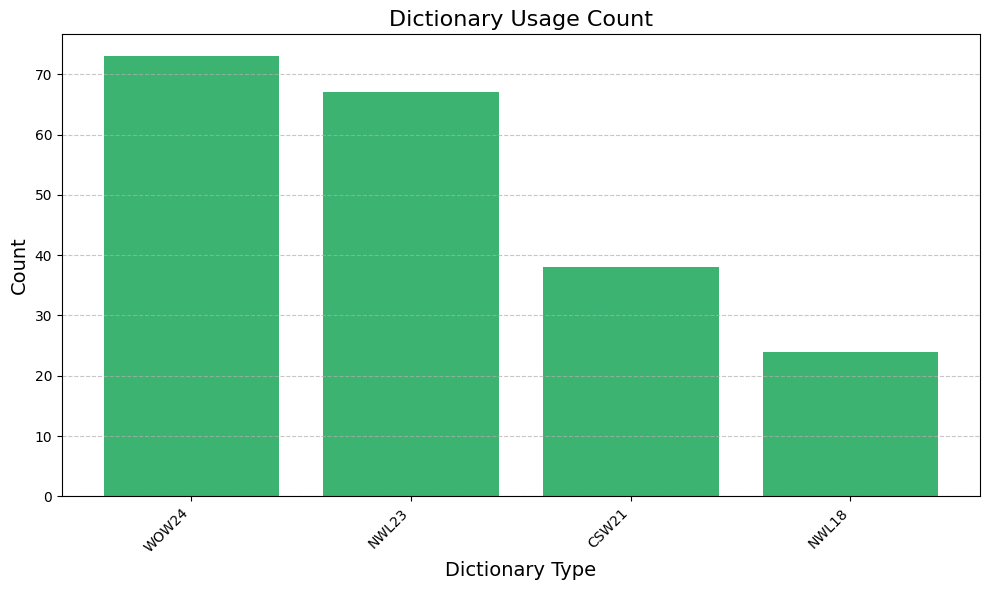

In [29]:
dictionary_count = pd.value_counts(all_games["Dictionary"])

plt.figure(figsize=(10, 6))
plt.bar(dictionary_count.index, dictionary_count.values, color='mediumseagreen')

plt.title('Dictionary Usage Count', fontsize=16)
plt.xlabel('Dictionary Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()